In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def read_csv(filepath: str):
  #reads a csv into a pandas dataframe

  try:
    dataframe = pd.read_csv(filepath, header=None)
    print(f"File '{filepath}' read successfully.")
    return dataframe

  except FileNotFoundError:
    print(f"Error: file '{filepath}' not found.")
    return None

  except Exception as e:
    print(f"An error occured while reading csv: {str(e)}.")
    return None

In [ ]:
# make sure dataset.csv is uploaded to this notebook in the content section
filepath: str = "all_dataset.csv"
data = read_csv(filepath)
print(data.head)

File 'all_dataset.csv' read successfully.
<bound method NDFrame.head of             0       1       2       3    4      5      6       7       8   \
0          1.0  2003.0  1104.0  1328.0  0.0 -0.208  0.208 -26.197 -26.197   
1          2.0  2003.0  1393.0  1272.0  0.0  0.090 -0.090  24.657  24.657   
2          3.0  2003.0  1437.0  1266.0  0.0 -0.318  0.318 -45.491 -45.491   
3          4.0  2003.0  1296.0  1457.0  0.0 -0.095  0.095 -15.167 -15.167   
4          5.0  2003.0  1400.0  1208.0  0.0  0.084 -0.084   5.181   5.181   
...        ...     ...     ...     ...  ...    ...    ...     ...     ...   
88409  88410.0  2018.0  1242.0  1181.0  0.0  0.011 -0.011   0.150   0.150   
88410  88411.0  2018.0  1437.0  1403.0  0.0  0.170 -0.170  38.129  38.129   
88411  88412.0  2018.0  1276.0  1260.0  0.0 -0.038  0.038  -4.709  -4.709   
88412  88413.0  2018.0  1437.0  1242.0  0.0  0.105 -0.105  19.357  19.357   
88413  88414.0  2018.0  1276.0  1437.0  0.0 -0.100  0.100 -32.325 -32.325   

   

# Model Parameters

In [ ]:
split: float = 0.15
n_pca_components: int = 13
n_rand_forest_estimators: int = 75

# Data Preprocessing


Training data length: 75151
Testing data length: 13263


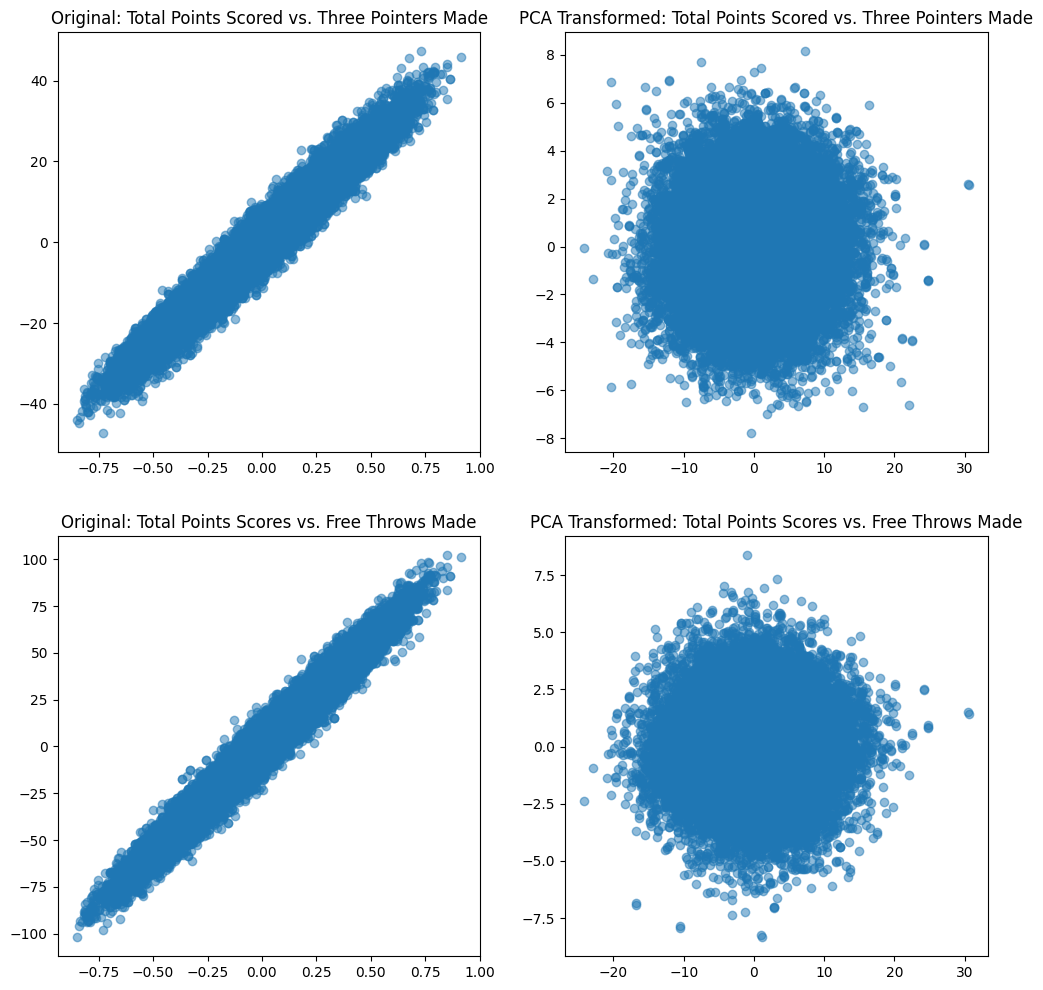

In [ ]:
X = data.iloc[:, 4:-1].values
y = data.iloc[:, -1].values

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.scatter(X[:, 1], X[:, 5], alpha=0.5)
plt.title('Original: Total Points Scored vs. Three Pointers Made')
plt.subplot(2, 2, 3)
plt.scatter(X[:, 1], X[:, 6], alpha=0.5)
plt.title('Original: Total Points Scores vs. Free Throws Made')

# apply principal compinent analysis to pick out the best predictors from the data.
pca = decomposition.PCA(n_components=n_pca_components)
pca.fit(X)
X = pca.transform(X)

plt.subplot(2, 2, 2)
plt.scatter(X[:, 1], X[:, 5], alpha=0.5)
plt.title('PCA Transformed: Total Points Scored vs. Three Pointers Made')
plt.subplot(2, 2, 4)
plt.scatter(X[:, 1], X[:, 6], alpha=0.5)
plt.title('PCA Transformed: Total Points Scores vs. Free Throws Made')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split)

# scale the taining and testing data so that all parameters are roughly the same magnitude
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(f"Training data length: {len(X_train)}")
print(f"Testing data length: {len(X_test)}")
plt.show()

# Model Creation

In [ ]:
# We will try multiple types of model and compare their accuracies

#1: Random Forest
start_rand_forest = time.time()
classifier_rand_forest = RandomForestClassifier(
    n_estimators = n_rand_forest_estimators,
    criterion = 'entropy'
)
classifier_rand_forest.fit(X_train, y_train)
end_rand_forest = time.time()
print(f"Random Forest training complete. Total time: {end_rand_forest - start_rand_forest}")

Random Forest training complete. Total time: 55.41344332695007


In [ ]:
#2: Logistic Regression
start_log_regression = time.time()
classifier_log_regression = LogisticRegression(solver = "lbfgs")
classifier_log_regression.fit(X_train, y_train)
end_log_regression = time.time()
print(f"Logistic Regression training complete. Total time: {end_log_regression - start_log_regression}")

Logistic Regression training complete. Total time: 0.10078310966491699


In [ ]:
#3: Naive Bayes
start_bayes = time.time()
classifier_bayes = GaussianNB()
classifier_bayes.fit(X_train, y_train)
end_bayes = time.time()
print(f"Naive Bayes training complete. Total time: {end_bayes - start_bayes}")

Naive Bayes training complete. Total time: 0.05880260467529297


# Model Testing

In [ ]:
y_pred_rand_forest = classifier_rand_forest.predict(X_test)
score_rand_forest = accuracy_score(y_test, y_pred_rand_forest)

y_pred_log_regression = classifier_log_regression.predict(X_test)
score_log_regression = accuracy_score(y_test, y_pred_log_regression)

y_pred_bayes = classifier_bayes.predict(X_test)
score_bayes = accuracy_score(y_test, y_pred_bayes)

print(f"Random Forest score: {score_rand_forest}")
print(f"Logistic Regression score: {score_log_regression}")
print(f"Naive Bayes score: {score_bayes}")

Random Forest score: 0.7615923999095228
Logistic Regression score: 0.7695091608233431
Naive Bayes score: 0.7667948427957476


# Results

Most recent runtime results:

*   Random Forest score: 0.75307
*   Logistic Regression score: 0.76197
*   Naive Bayes score: 0.76159

Logistic regression seems to outperform the others by a very small margin

# 2024 Predictions